# Librería

In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Modelos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import  RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, \
roc_curve, roc_auc_score, ConfusionMatrixDisplay, multilabel_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
URL = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic = pd.read_csv(URL, index_col='PassengerId')

PassengerId -> Muestra el id del Pasajero (solamente es un indicador.) 

Survived -> Se encuentra en 2 valores 0 si murió en la trajedia y 1 si sobrevivió.

Pclass -> Determina la clase del pasajero, 1ra, 2da o 3era clase. 

Name -> Nombre de los Pasajeros. 

Sex -> Sexo de los Pasajeros.

Age -> Edad de los Pasajeros.

SibSp -> Número de parientes como Hermano, Hermana, Hermanastra, Hermanastro, Esposo o Esposa. 

Parch -> Número de parientes como Madre, Padre, Hijo, Hija, Hijastro, Hijastra.

Ticket -> Número del ticket o boleto. 

Fare -> Tarifa del pasaje. 

Cabin -> Número de cabina del pasajero. 

Embarked -> Muestra los datos del puerto de embarcaquedero. (C = Cherbourg, Q = Queenston, S = Southapmtpon)

# Primera Exploración

In [3]:
df = titanic.copy()

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.shape

(891, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


- Age - Cabin - Embarked poseen nulos
- Tenemos 5 columnas de tipo object -> Pasar a datos númericos.

In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Survived es binaria númerica.
- Pclass -> podemos observar tres tipos de clases, donde la mayor parte se encuentra en la 3.
- Age -> Podemos notar que hiberon niños en el barco.
- Fare -> el boleto más caro es de 512.

In [9]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


- Name -> no es importante para saber si sobrevivió o no. Corresponde al requisito que son todos únicos.
- Ticket -> demasiados únicos, pero hay repetidos por lo que le quita cierto valor.
- Cabin -> Posee varios nulos.

<Axes: >

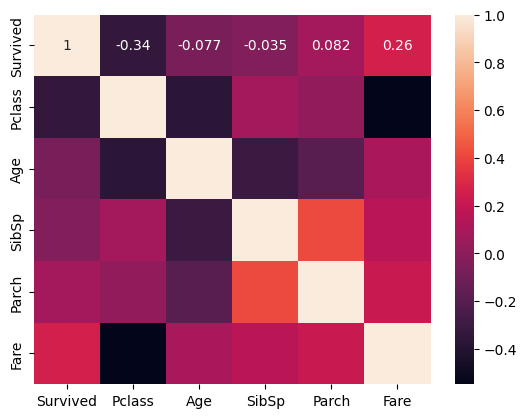

In [10]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Mini EDA

In [11]:
from clases import CategoricalReport, NumericReport


 ************************************************************************************************************** 

Variable : NAME

+---------------------------------------------------+---------------------------+
|                   Valores Únicos                  | Frecuencia de Mayor Valor |
+---------------------------------------------------+---------------------------+
|              Braund, Mr. Owen Harris              |             1             |
|           Saundercock, Mr. William Henry          |             1             |
|            Andersson, Mr. Anders Johan            |             1             |
|               Heikkinen, Miss. Laina              |             1             |
|    Futrelle, Mrs. Jacques Heath (Lily May Peel)   |             1             |
|              Allen, Mr. William Henry             |             1             |
|                  Moran, Mr. James                 |             1             |
|              McCarthy, Mr. Timothy J          

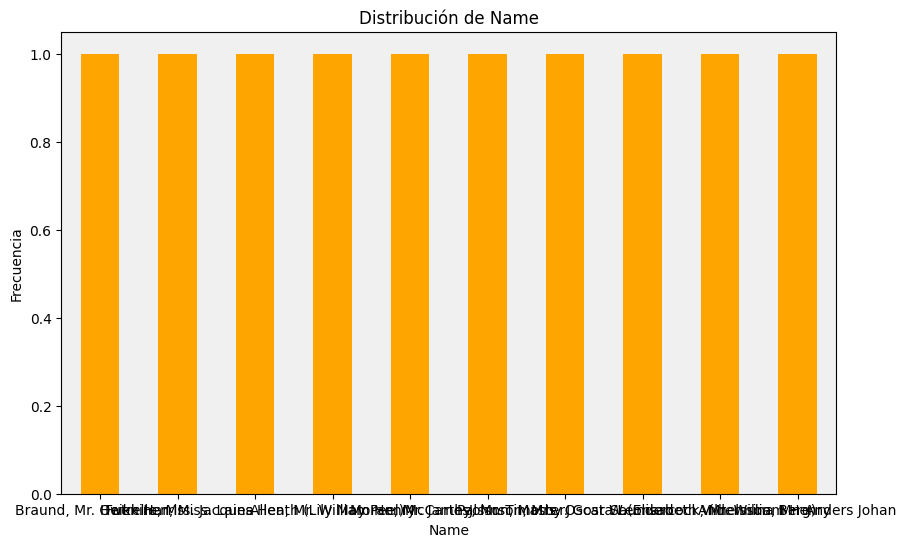


 ************************************************************************************************************** 

Variable : SEX

+----------------+---------------------------+
| Valores Únicos | Frecuencia de Mayor Valor |
+----------------+---------------------------+
|      male      |            577            |
|     female     |            314            |
+----------------+---------------------------+

Nulos: 0 (0.00%) sobre el total: 891 rows

+------+-----------------------+
| Moda | Frecuencia de la moda |
+------+-----------------------+
| male |           1           |
+------+-----------------------+


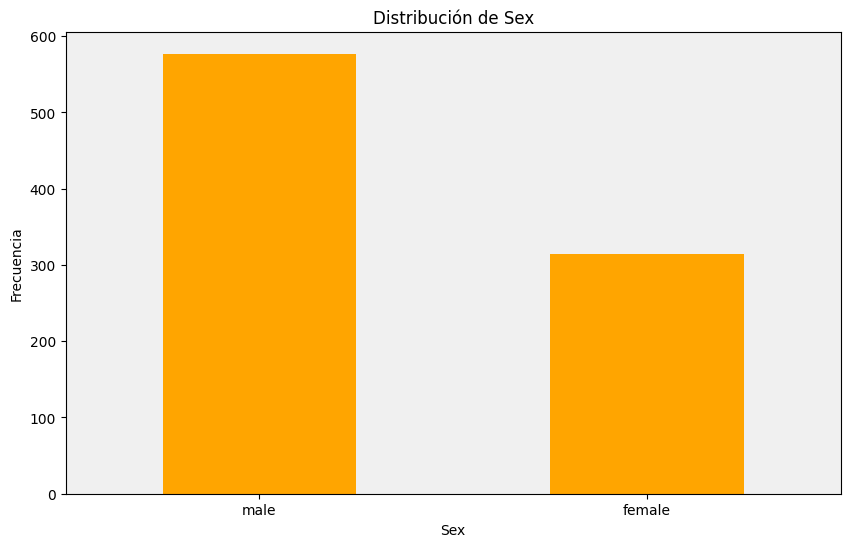


 ************************************************************************************************************** 

Variable : TICKET

+----------------+---------------------------+
| Valores Únicos | Frecuencia de Mayor Valor |
+----------------+---------------------------+
|     347082     |             7             |
|      1601      |             7             |
|    CA. 2343    |             7             |
|    3101295     |             6             |
|    CA 2144     |             6             |
|     347088     |             6             |
|  S.O.C. 14879  |             5             |
|     382652     |             5             |
|      4133      |             4             |
|     347077     |             4             |
+----------------+---------------------------+

Nulos: 0 (0.00%) sobre el total: 891 rows

+------+-----------------------+
| Moda | Frecuencia de la moda |
+------+-----------------------+
| 1601 |           3           |
+------+-----------------------+

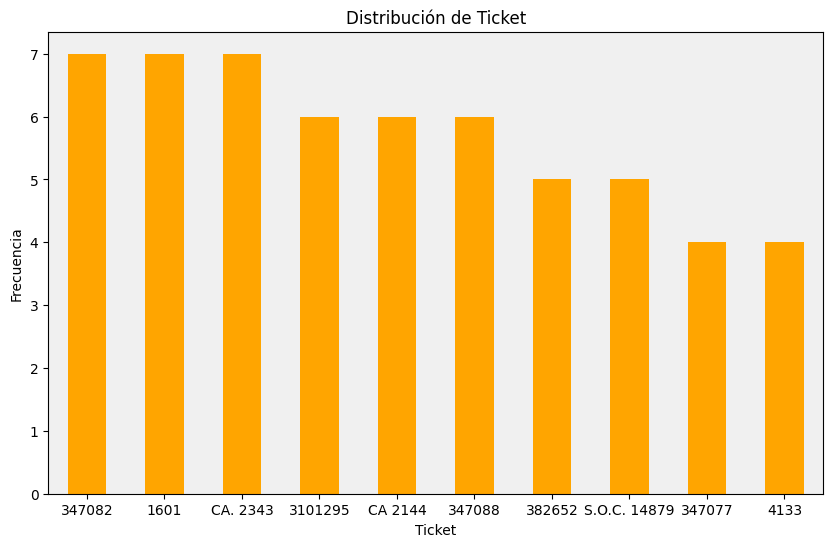


 ************************************************************************************************************** 

Variable : CABIN

+----------------+---------------------------+
| Valores Únicos | Frecuencia de Mayor Valor |
+----------------+---------------------------+
|    B96 B98     |             4             |
|  C23 C25 C27   |             4             |
|       G6       |             4             |
|    C22 C26     |             3             |
|      F33       |             3             |
|       F2       |             3             |
|      E101      |             3             |
|       D        |             3             |
|      D26       |             2             |
|       F4       |             2             |
+----------------+---------------------------+

Nulos: 687 (77.10%) sobre el total: 891 rows

+---------+-----------------------+
|   Moda  | Frecuencia de la moda |
+---------+-----------------------+
| B96 B98 |           3           |
+---------+-------

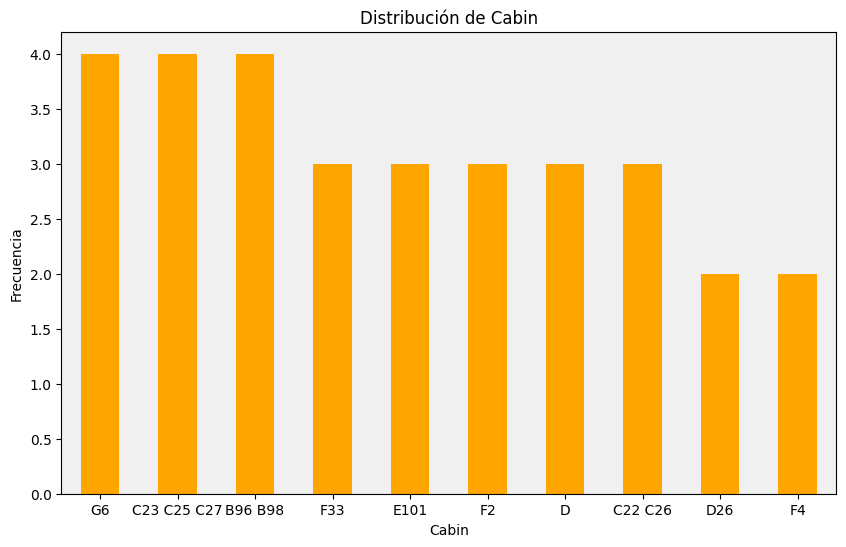


 ************************************************************************************************************** 

Variable : EMBARKED

+----------------+---------------------------+
| Valores Únicos | Frecuencia de Mayor Valor |
+----------------+---------------------------+
|       S        |            644            |
|       C        |            168            |
|       Q        |             77            |
+----------------+---------------------------+

Nulos: 2 (0.22%) sobre el total: 891 rows

+------+-----------------------+
| Moda | Frecuencia de la moda |
+------+-----------------------+
|  S   |           1           |
+------+-----------------------+


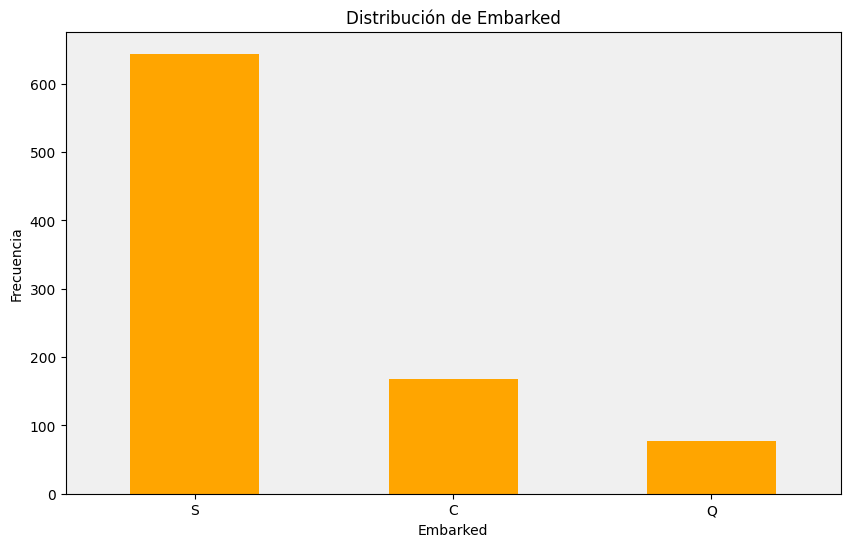

In [12]:
# Crear una instancia de la clase
categorical_reporter = CategoricalReport(df)

# Generar informe para la columna 'Category'
categorical_reporter.generate_report('Name', color= "orange")
categorical_reporter.generate_report('Sex', color="orange")
categorical_reporter.generate_report('Ticket', color="orange")
categorical_reporter.generate_report('Cabin', color="orange")
categorical_reporter.generate_report('Embarked', color="orange")


 ************************************************************************************************************** 

Variable : SURVIVED

+----------------+------------+
| Valores Únicos | Frecuencia |
+----------------+------------+
|       0        |    549     |
|       1        |    342     |
+----------------+------------+

Nulos: 0 (0.00%) sobre el total: 891 rows

+---------------------+-------+
|  Medidas Centrales  | Valor |
+---------------------+-------+
|        Media        |  0.38 |
|       Mediana       |  0.00 |
| Desviación Estándar |  0.49 |
+---------------------+-------+

+--------------------------+-------+
| Forma de la Distribución | Valor |
+--------------------------+-------+
|         Curtosis         | -1.78 |
|        Asimetría         |  0.48 |
+--------------------------+-------+

 ************************************************************************************************************** 



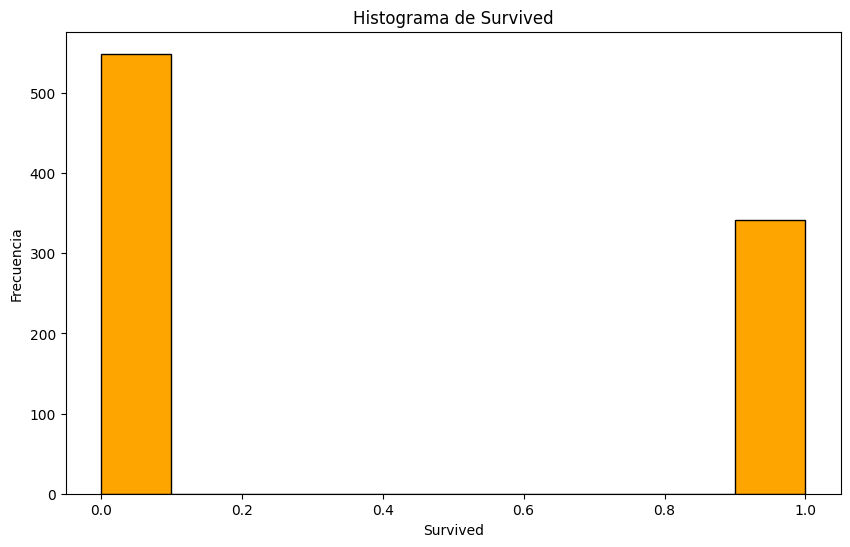


 ************************************************************************************************************** 

Variable : PCLASS

+----------------+------------+
| Valores Únicos | Frecuencia |
+----------------+------------+
|       3        |    491     |
|       1        |    216     |
|       2        |    184     |
+----------------+------------+

Nulos: 0 (0.00%) sobre el total: 891 rows

+---------------------+-------+
|  Medidas Centrales  | Valor |
+---------------------+-------+
|        Media        |  2.31 |
|       Mediana       |  3.00 |
| Desviación Estándar |  0.84 |
+---------------------+-------+

+--------------------------+-------+
| Forma de la Distribución | Valor |
+--------------------------+-------+
|         Curtosis         | -1.28 |
|        Asimetría         | -0.63 |
+--------------------------+-------+

 ************************************************************************************************************** 



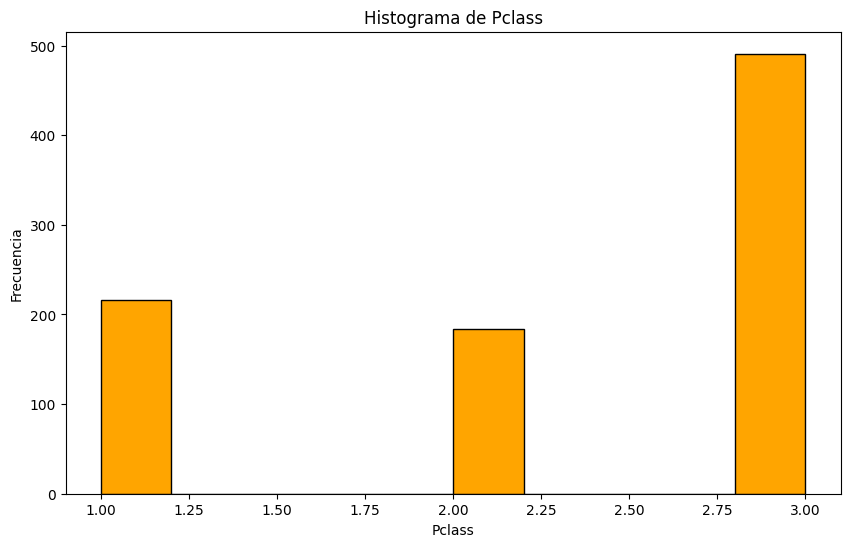


 ************************************************************************************************************** 

Variable : AGE

+----------------+------------+
| Valores Únicos | Frecuencia |
+----------------+------------+
|      24.0      |     30     |
|      22.0      |     27     |
|      18.0      |     26     |
|      28.0      |     25     |
|      19.0      |     25     |
|      30.0      |     25     |
|      21.0      |     24     |
|      25.0      |     23     |
|      36.0      |     22     |
|      29.0      |     20     |
+----------------+------------+

Nulos: 177 (19.87%) sobre el total: 891 rows

+---------------------+-------+
|  Medidas Centrales  | Valor |
+---------------------+-------+
|        Media        | 29.70 |
|       Mediana       | 28.00 |
| Desviación Estándar | 14.53 |
+---------------------+-------+

+--------------------------+-------+
| Forma de la Distribución | Valor |
+--------------------------+-------+
|         Curtosis         |  0.18 |
|

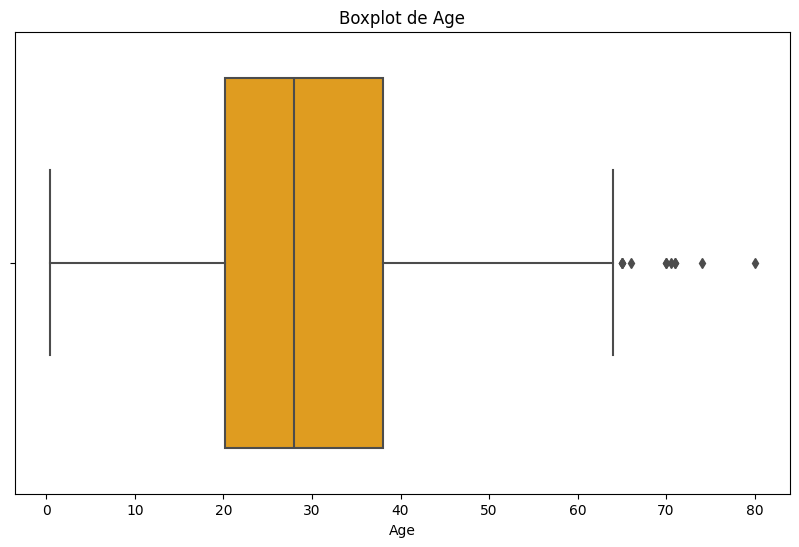


 ************************************************************************************************************** 

Variable : SIBSP

+----------------+------------+
| Valores Únicos | Frecuencia |
+----------------+------------+
|       0        |    608     |
|       1        |    209     |
|       2        |     28     |
|       4        |     18     |
|       3        |     16     |
|       8        |     7      |
|       5        |     5      |
+----------------+------------+

Nulos: 0 (0.00%) sobre el total: 891 rows

+---------------------+-------+
|  Medidas Centrales  | Valor |
+---------------------+-------+
|        Media        |  0.52 |
|       Mediana       |  0.00 |
| Desviación Estándar |  1.10 |
+---------------------+-------+

+--------------------------+-------+
| Forma de la Distribución | Valor |
+--------------------------+-------+
|         Curtosis         | 17.88 |
|        Asimetría         |  3.70 |
+--------------------------+-------+

 **********************

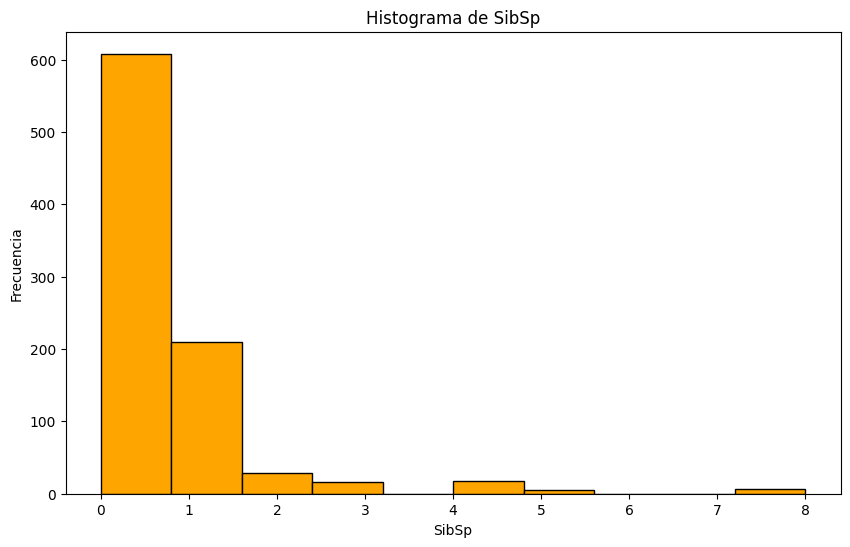


 ************************************************************************************************************** 

Variable : PARCH

+----------------+------------+
| Valores Únicos | Frecuencia |
+----------------+------------+
|       0        |    678     |
|       1        |    118     |
|       2        |     80     |
|       5        |     5      |
|       3        |     5      |
|       4        |     4      |
|       6        |     1      |
+----------------+------------+

Nulos: 0 (0.00%) sobre el total: 891 rows

+---------------------+-------+
|  Medidas Centrales  | Valor |
+---------------------+-------+
|        Media        |  0.38 |
|       Mediana       |  0.00 |
| Desviación Estándar |  0.81 |
+---------------------+-------+

+--------------------------+-------+
| Forma de la Distribución | Valor |
+--------------------------+-------+
|         Curtosis         |  9.78 |
|        Asimetría         |  2.75 |
+--------------------------+-------+

 **********************

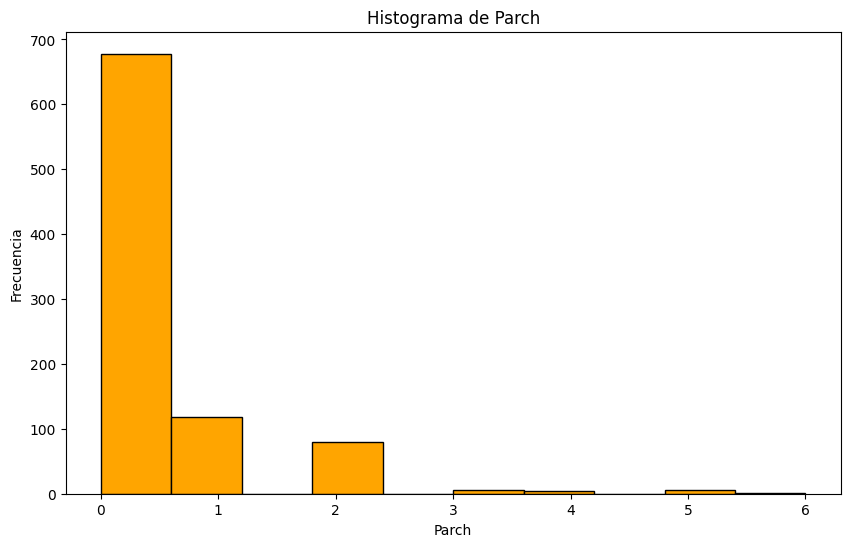


 ************************************************************************************************************** 

Variable : FARE

+----------------+------------+
| Valores Únicos | Frecuencia |
+----------------+------------+
|      8.05      |     43     |
|      13.0      |     42     |
|     7.8958     |     38     |
|      7.75      |     34     |
|      26.0      |     31     |
|      10.5      |     24     |
|     7.925      |     18     |
|     7.775      |     16     |
|     26.55      |     15     |
|     7.2292     |     15     |
+----------------+------------+

Nulos: 0 (0.00%) sobre el total: 891 rows

+---------------------+-------+
|  Medidas Centrales  | Valor |
+---------------------+-------+
|        Media        | 32.20 |
|       Mediana       | 14.45 |
| Desviación Estándar | 49.69 |
+---------------------+-------+

+--------------------------+-------+
| Forma de la Distribución | Valor |
+--------------------------+-------+
|         Curtosis         | 33.40 |
|  

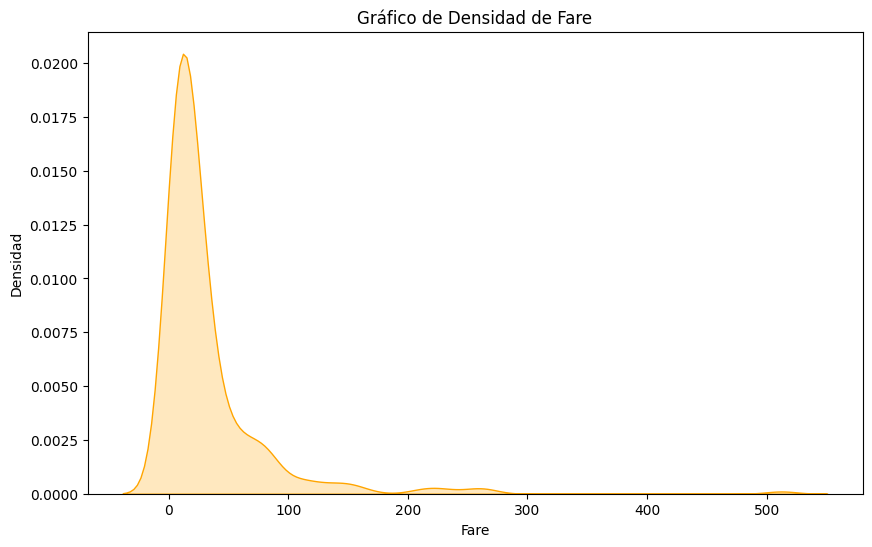

In [13]:
# Crear una instancia de la clase
numeric_reporter = NumericReport(df)

numeric_reporter.generate_report('Survived', 'histograma', color='orange')
numeric_reporter.generate_report('Pclass', 'histograma', color='orange')
numeric_reporter.generate_report('Age', 'boxplot', color='orange')
numeric_reporter.generate_report('SibSp', 'histograma', color='orange')
numeric_reporter.generate_report('Parch', 'histograma', color='orange')
numeric_reporter.generate_report('Fare', 'densidad', color='orange')

#### análisis bivariante

- Para un modelo de clasificación, generalmente se prefiere utilizar medidas de correlación que capturen relaciones monotónicas y no necesariamente lineales. En este caso, las correlaciones de rango, como la correlación de Spearman o Kendall, podrían ser más apropiadas que la correlación de Pearson, que asume una relación lineal.

In [14]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='Survived', ylabel='SibSp'>

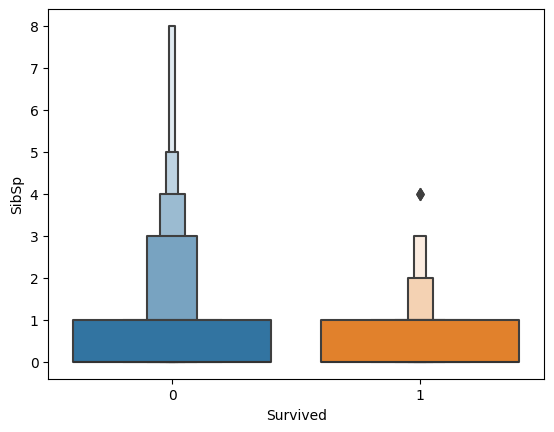

In [15]:
sns.boxenplot(data=df, x='Survived', y ='SibSp')

- Podemos notar que a mayor familiar, menos se sobrevivía.

<Axes: xlabel='Embarked', ylabel='Fare'>

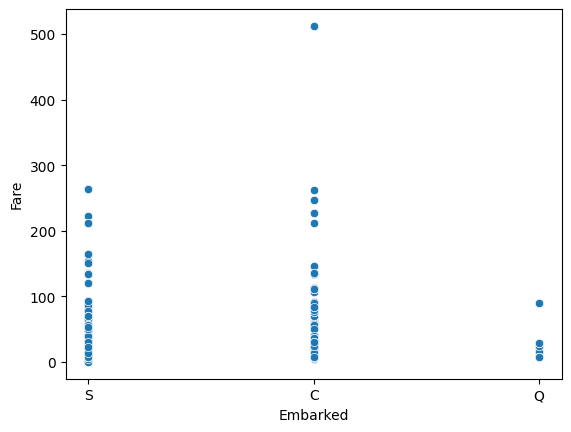

In [16]:
sns.scatterplot(data=df, y='Fare', x ='Embarked')

<Axes: xlabel='Pclass', ylabel='Fare'>

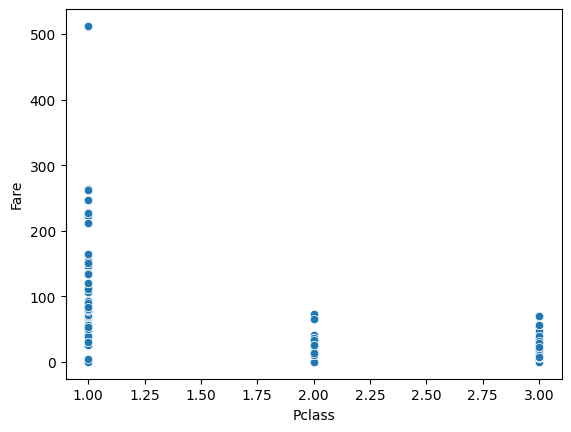

In [17]:
sns.scatterplot(data=df, y='Fare', x ='Pclass')

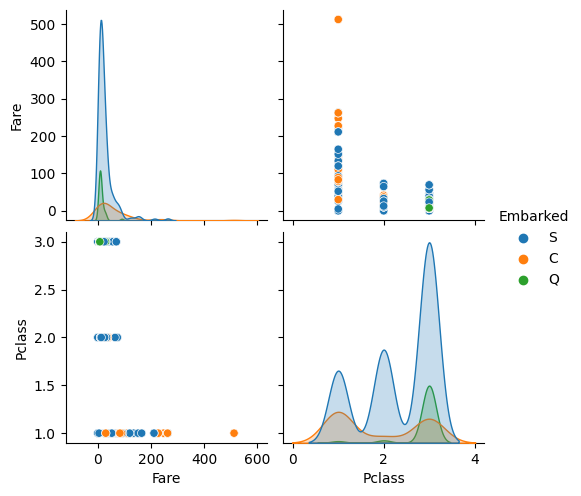

In [18]:
# Crear el gráfico de matriz de dispersión
sns.pairplot(data=df, hue='Embarked', vars=['Fare', 'Pclass'], diag_kind='kde')

# Mostrar el gráfico
plt.show()


- C -> se pagaron los Fare más caros, pertenecientes la mayoría a primera clase.
- Q -> se pagaron los Fare más baratos, pertenecientes a tercera clase. INCORRECTO

In [19]:
df.groupby(['Pclass', 'Embarked'])['Fare'].median()

Pclass  Embarked
1       C           78.2667
        Q           90.0000
        S           52.0000
2       C           24.0000
        Q           12.3500
        S           13.5000
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

Las tarifas promedio más altas corresponden a los pasajeros de primera clase (Pclass=1), seguidas por la segunda clase (Pclass=2) y luego la tercera clase (Pclass=3). 

La relación entre la tarifa promedio y el puerto de embarque (Embarked) varía. Por ejemplo:

1) Para la primera clase, la tarifa promedio más alta corresponde a los pasajeros que embarcaron desde el puerto de Queenstown (Q), seguida por el puerto de Cherbourg (C) y luego Southampton (S).

2) Para la segunda clase, la tarifa promedio más alta también corresponde a los pasajeros que embarcaron desde Queenstown (Q), seguida por Cherbourg (C) y luego Southampton (S).

3) Para la tercera clase, la tarifa promedio más alta corresponde a los pasajeros que embarcaron desde Cherbourg (C), seguida por Southampton (S) y luego Queenstown (Q).

Supongamos que tenemos los siguientes datos de pasajeros del Titanic:

- Pasajero 1: Clase 1, embarcado en C (Cherbourg)
- Pasajero 2: Clase 2, embarcado en S (Southampton)
- Pasajero 3: Clase 3, embarcado en C (Cherbourg)
- Pasajero 4: Clase 1, embarcado en Q (Queenstown)
- Pasajero 5: Clase 2, embarcado en S (Southampton)

Aquí hay una tabla que muestra estos datos:

| Pasajero | Clase | Embarcado |
|----------|-------|-----------|
| 1        | 1     | C         |
| 2        | 2     | S         |
| 3        | 3     | C         |
| 4        | 1     | Q         |
| 5        | 2     | S         |

Ahora, vamos a calcular el porcentaje de embarque por clase.

1. Primero, agrupamos los datos por clase y puerto de embarque y contamos cuántos pasajeros hay en cada combinación. Entonces, obtenemos algo como esto:

```
Pclass  Embarked
1       C           1
        Q           1
2       S           2
3       C           1
dtype: int64
```

Esto nos dice cuántos pasajeros de cada clase embarcaron desde cada puerto.

2. Luego, calculamos el total de pasajeros por clase. En nuestro ejemplo, tenemos:

```
Pclass
1    2
2    2
3    1
dtype: int64
```

3. Finalmente, dividimos el recuento de embarque por clase y puerto entre el total de pasajeros por clase y lo multiplicamos por 100 para obtener el porcentaje de embarque por clase y puerto. Por ejemplo, para la clase 1:

```
Porcentaje de embarque para clase 1:
C: (1 / 2) * 100 = 50%
Q: (1 / 2) * 100 = 50%
```

Esto significa que el 50% de los pasajeros de clase 1 embarcaron desde el puerto C y el 50% desde el puerto Q.


In [20]:
# Agrupar por clase y puerto de embarque y calcular el recuento de pasajeros
count_by_class_and_embarked = df.groupby(['Pclass', 'Embarked']).size()

# Calcular el total de pasajeros por clase
total_passengers_by_class = df.groupby('Pclass').size()

# Calcular el porcentaje de embarque por clase
percentage_embarked_by_class = (count_by_class_and_embarked / total_passengers_by_class) * 100

print("Porcentaje de embarque por clase y puerto:")
print(percentage_embarked_by_class)


Porcentaje de embarque por clase y puerto:
Pclass  Embarked
1       C           39.351852
        Q            0.925926
        S           58.796296
2       C            9.239130
        Q            1.630435
        S           89.130435
3       C           13.441955
        Q           14.663951
        S           71.894094
dtype: float64


<Axes: xlabel='Pclass', ylabel='Survived'>

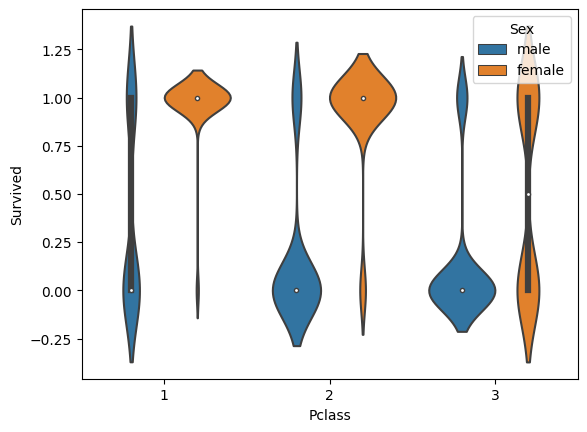

In [21]:
sns.violinplot(data=df, x='Pclass', y ='Survived', hue="Sex")

<Axes: xlabel='Fare', ylabel='Age'>

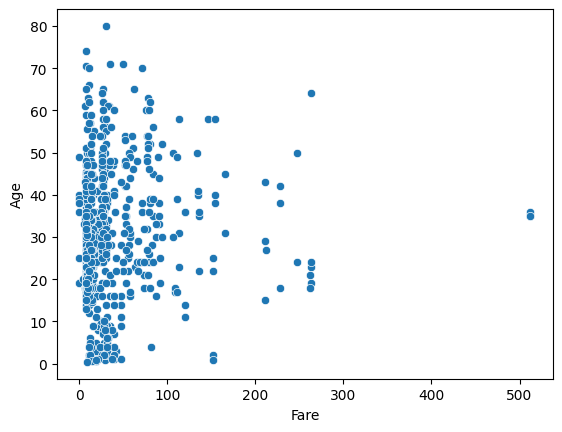

In [22]:
sns.scatterplot(data=df, x='Fare', y='Age')

# Tratamiento de missing y valores atípicos

In [36]:
df = titanic.copy()

In [37]:
df.drop(columns=['Cabin', 'Ticket'], inplace=True) # No tiene sentido rellenar la cabina y el ticket

In [38]:
df[df['Embarked'].isna()] # -> Pclass = 1 por ende la moda que es S, no sería lo ideal. Luego el Fare, como podemos apreciar

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


In [39]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True) # Lo llenamos con la métrica central MODA

In [40]:
import math
df_female = df[df['Sex'] == 'female'] # Según si era niña o mujer rellenamos con la media
df_male = df[df['Sex'] == 'male']

df_male['Age'].fillna(math.floor( df_male[df_male['Name'].str.contains('Master')]['Age'].mean() ), inplace=True)
df_male['Age'].fillna(math.floor( df_male[( (df_male['Name'].str.contains('Mr.')) & (df_male['Sex'] == 'male') )]['Age'].mean() ), inplace=True)

df_female['Age'].fillna(math.floor( df_female[df_female['Name'].str.contains('Miss')]['Age'].mean() ), inplace=True)
df_female['Age'].fillna(math.floor( df_female[( (df_female['Name'].str.contains('Mrs.'))  &  (df_female['Sex'] == 'female') )]['Age'].mean() ), inplace=True)

df = pd.concat((df_male, df_female))

In [28]:
df.duplicated().sum()

0

In [29]:
df.shape

(891, 9)

In [41]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Feature Engineer

In [31]:
# # Creación de columnas
# # Una idea (SibSp - Parch) si es mayor a 1, el pasajero fue acompañado. 
# df['FamilySize'] = np.where(df['SibSp'] + df['Parch'] >= 1, 1, 0)
# # Crear una columna adicional, adult@/niñ@
# # df['Persona'] = np.where(df['Age'] <= 14, 'niño/a', 'adulto/a')
# df['Persona'] = np.where((df['Age'] <= 14) & (df['Sex'] == 'female'), 'niña', 
#                 np.where((df['Age'] > 14) & (df['Sex'] == 'female'), 'mujer', 
#                     np.where(df['Age'] <= 14, 'niño', 'hombre')))
# df.head(3)

# Modelo 1

## División de Datos

In [32]:
# Creación de columnas
# Una idea (SibSp - Parch) si es mayor a 1, el pasajero fue acompañado. 
df['FamilySize'] = np.where(df['SibSp'] + df['Parch'] >= 1, 1, 0)
# Crear una columna adicional, adult@/niñ@
df['Persona'] = np.where(df['Age'] <= 14, 'niño/a', 'adulto/a')
# df['Persona'] = np.where((df['Age'] <= 14) & (df['Sex'] == 'female'), 'niña', 
#                 np.where((df['Age'] > 14) & (df['Sex'] == 'female'), 'mujer', 
#                     np.where(df['Age'] <= 14, 'niño', 'hombre')))
# df.head(3)

In [33]:
mapeo = {'male': 0, 'female' : 1}
df['Sex'] = df['Sex'].map(mapeo)

mapeo = {'niño/a': 0, 'adulto/a' : 1}
df['Persona'] = df['Persona'].map(mapeo)

In [34]:
X_1 = df.drop(columns=['Name','SibSp','Parch','Survived', 'Age'])
y_1 = df['Survived']

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=24)

## Escalado + Dummies

In [35]:
OHE = OneHotEncoder(sparse=False, handle_unknown='ignore')
OHE.fit(x_train_1[['Embarked', 'Pclass']])
OHE.fit(x_test_1[['Embarked', 'Pclass']])

transformed_x_test_1 = OHE.transform(x_test_1[['Embarked', 'Pclass']])
transformed_x_train_1 = OHE.transform(x_train_1[['Embarked', 'Pclass']])

transformed_x_test_1 = pd.DataFrame(transformed_x_test_1, columns=OHE.get_feature_names_out(['Embarked', 'Pclass']), index=x_test_1.index)
transformed_x_train_1 = pd.DataFrame(transformed_x_train_1, columns=OHE.get_feature_names_out(['Embarked', 'Pclass']), index=x_train_1.index)

In [36]:
x_train_1 = pd.concat((x_train_1, transformed_x_train_1), axis=1)
x_test_1 = pd.concat((x_test_1, transformed_x_test_1), axis=1)

In [37]:
x_train_1.drop(columns=['Embarked', 'Pclass'], inplace=True)
x_test_1.drop(columns=['Embarked', 'Pclass'], inplace=True)

In [38]:
x_train_1 # estandarizar Fare

,Sex,Fare,FamilySize,Persona,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,
111,0,52.0000,0,1,0.0,0.0,1.0,1.0,0.0,0.0
517,1,10.5000,0,1,0.0,0.0,1.0,0.0,1.0,0.0
382,1,15.7417,1,0,1.0,0.0,0.0,0.0,0.0,1.0
150,0,13.0000,0,1,0.0,0.0,1.0,0.0,1.0,0.0
185,1,22.0250,1,0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
223,0,8.0500,0,1,0.0,0.0,1.0,0.0,0.0,1.0
634,0,0.0000,0,0,0.0,0.0,1.0,1.0,0.0,0.0
550,0,36.7500,1,0,0.0,0.0,1.0,0.0,1.0,0.0


In [39]:
x_test_1

,Sex,Fare,FamilySize,Persona,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,
263,0,79.6500,1,1,0.0,0.0,1.0,1.0,0.0,0.0
852,0,7.7750,0,1,0.0,0.0,1.0,0.0,0.0,1.0
333,0,153.4625,1,1,0.0,0.0,1.0,1.0,0.0,0.0
117,0,7.7500,0,1,0.0,1.0,0.0,0.0,0.0,1.0
280,1,20.2500,1,1,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
14,0,31.2750,1,1,0.0,0.0,1.0,0.0,0.0,1.0
160,0,69.5500,1,0,0.0,0.0,1.0,0.0,0.0,1.0
527,1,10.5000,0,1,0.0,0.0,1.0,0.0,1.0,0.0


In [41]:
# # Aplicando StandardScaler
scaler = MinMaxScaler()
x_train_1['Fare'] = scaler.fit_transform(x_train_1[['Fare']])
# ------------------------------------
#TEST_X
x_test_1['Fare'] = scaler.transform(x_test_1[['Fare']])

In [42]:
x_train_1['Persona'] = scaler.fit_transform(x_train_1[['Persona']])
x_test_1['Persona'] = scaler.transform(x_test_1[['Persona']])

In [43]:
x_train_1.describe()

,Sex,Fare,FamilySize,Persona,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.356742,0.063496,0.382022,0.773876,0.195225,0.089888,0.714888,0.254213,0.209270,0.536517
std,0.479374,0.100455,0.486224,0.418614,0.396652,0.286222,0.451785,0.435724,0.407073,0.499015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.015469,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.028221,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.060508,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Cross-Validation + Base-Lines

In [44]:
modelos = {
    'lr': LogisticRegression(random_state=24),
    'dt': DecisionTreeClassifier(random_state=24),
    'rf': RandomForestClassifier(random_state=24),
    "SVC_linear": SVC(kernel='linear'),
    "voting_clf" : VotingClassifier(estimators=[('lr', LogisticRegression(random_state=24)),('rf', RandomForestClassifier(random_state=24))])
}

# Define las métricas a usar
metricas = ["accuracy", "f1_macro", "recall_macro", "precision_macro", "roc_auc_ovr"]

resultados_dict = {}

for nombre_modelo, modelo in modelos.items():
    cv_resultados = cross_validate(modelo, x_train_1, y_train_1, cv=5, scoring=metricas)
    
    for metrica in metricas:
        clave = f"{nombre_modelo}_{metrica}"
        resultados_dict[clave] = cv_resultados[f"test_{metrica}"].mean()

# Convertir el diccionario de resultados en DataFrame
resultados_df = pd.DataFrame([resultados_dict])

In [45]:
resultados_df.T  # El Random Forest por 3 puntos a logisticregression en accuracy

,0
lr_accuracy,0.782320
lr_f1_macro,0.770157
lr_recall_macro,0.767806
lr_precision_macro,0.777999
lr_roc_auc_ovr,0.839679
dt_accuracy,0.814597
dt_f1_macro,0.803575
dt_recall_macro,0.799393
dt_precision_macro,0.812415
dt_roc_auc_ovr,0.802359


In [46]:
x_train_1.columns

Index(['Sex', 'Fare', 'FamilySize', 'Persona', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

##### Random forest elegido como mejor modelo con estas features : 
 - 'Sex', 'Fare', 'FamilySize', 'Persona', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3'
 
Modelo 1

| Métrica | Valor |
| -----| ------|
|rf_accuracy|	0.814646|
|rf_f1_macro|	0.804546|
|rf_recall_macro|	0.801167|
|rf_precision_macro|	0.811440|
|rf_roc_auc_ovr|	0.854046|


# Modelo 2

In [125]:
# Creación de columnas
# Una idea (SibSp - Parch) si es mayor a 1, el pasajero fue acompañado. 
df['FamilySize'] = np.where(df['SibSp'] + df['Parch'] >= 1, 1, 0)
# Crear una columna adicional, adult@/niñ@
# df['Persona'] = np.where(df['Age'] <= 14, 'niño/a', 'adulto/a')
df['Persona'] = np.where((df['Age'] <= 14) & (df['Sex'] == 'female'), 'niña', 
                np.where((df['Age'] > 14) & (df['Sex'] == 'female'), 'mujer', 
                    np.where(df['Age'] <= 14, 'niño', 'hombre')))
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Persona
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,hombre
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,hombre
6,0,3,"Moran, Mr. James",male,4.0,0,0,8.4583,Q,0,niño


In [126]:
mapeo = {'male': 0, 'female' : 1}
df['Sex'] = df['Sex'].map(mapeo)

mapeo = {'niño': 0, 'niña': 1, 'hombre' : 3, 'mujer': 4}
df['Persona'] = df['Persona'].map(mapeo)

mapeo = {1 :3, 2: 2, 3: 1}
df['Pclass'] = df['Pclass'].map(mapeo)

In [127]:
X_2 = df.drop(columns=['Name','SibSp','Parch','Survived', 'Age'])
y_2 = df['Survived']

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=24)

In [128]:
OHE = OneHotEncoder(sparse=False, handle_unknown='ignore')
OHE.fit(x_train_2[['Embarked']])
OHE.fit(x_test_2[['Embarked']])

transformed_x_test_2 = OHE.transform(x_test_2[['Embarked']])
transformed_x_train_2 = OHE.transform(x_train_2[['Embarked']])

transformed_x_test_2 = pd.DataFrame(transformed_x_test_2, columns=OHE.get_feature_names_out(['Embarked']), index=x_test_2.index)
transformed_x_train_2 = pd.DataFrame(transformed_x_train_2, columns=OHE.get_feature_names_out(['Embarked']), index=x_train_2.index)

x_train_2 = pd.concat((x_train_2, transformed_x_train_2), axis=1)
x_test_2 = pd.concat((x_test_2, transformed_x_test_2), axis=1)

x_train_2.drop(columns=['Embarked'], inplace=True)
x_test_2.drop(columns=['Embarked'], inplace=True)

In [129]:
# # Aplicando StandardScaler
scaler = StandardScaler()
x_train_2['Fare'] = scaler.fit_transform(x_train_2[['Fare']])
# ------------------------------------
#TEST_X
x_test_2['Fare'] = scaler.transform(x_test_2[['Fare']])

In [130]:
x_train_2['Persona'] = scaler.fit_transform(x_train_2[['Persona']])
x_test_2['Persona'] = scaler.transform(x_test_2[['Persona']])

In [131]:
modelos = {
    'lr': LogisticRegression(random_state=24),
    'dt': DecisionTreeClassifier(random_state=24),
    'rf': RandomForestClassifier(random_state=24),
    "SVC_linear": SVC(kernel='linear'),
    "voting_clf" : VotingClassifier(estimators=[('lr', LogisticRegression(random_state=24)),('rf', RandomForestClassifier(random_state=24))])
}

# Define las métricas a usar
metricas = ["accuracy", "f1_macro", "recall_macro", "precision_macro", "roc_auc_ovr"]

resultados_dict = {}

for nombre_modelo, modelo in modelos.items():
    cv_resultados = cross_validate(modelo, x_train_2, y_train_2, cv=5, scoring=metricas)
    
    for metrica in metricas:
        clave = f"{nombre_modelo}_{metrica}"
        resultados_dict[clave] = cv_resultados[f"test_{metrica}"].mean()

# Convertir el diccionario de resultados en DataFrame
resultados_df = pd.DataFrame([resultados_dict])

In [132]:
resultados_df.T

,0
lr_accuracy,0.776677
lr_f1_macro,0.765622
lr_recall_macro,0.764861
lr_precision_macro,0.771377
lr_roc_auc_ovr,0.838608
dt_accuracy,0.818802
dt_f1_macro,0.808115
dt_recall_macro,0.804078
dt_precision_macro,0.817432
dt_roc_auc_ovr,0.808289


In [133]:
x_train_2.columns

Index(['Pclass', 'Sex', 'Fare', 'FamilySize', 'Persona', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

Random Forest con estas features :  

- 'Pclass', 'Sex', 'Fare', 'FamilySize', 'Persona', 'Embarked_C', 'Embarked_Q', 'Embarked_S'

| Métricas | Valor |
| ---|----|
| rf_accuracy|	0.814646|
|rf_f1_macro|	0.804906|
|rf_recall_macro|	0.801745|
|rf_precision_macro|	0.812700|
|rf_roc_auc_ovr|	0.852983|


# Modelo 3

In [42]:
# Crear una columna adicional, adult@/niñ@
df['Persona'] = np.where((df['Age'] <= 14) & (df['Sex'] == 'female'), 'niña', 
                np.where((df['Age'] > 14) & (df['Sex'] == 'female'), 'mujer', 
                    np.where(df['Age'] <= 14, 'niño', 'hombre')))
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Persona
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,hombre
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,hombre
6,0,3,"Moran, Mr. James",male,4.0,0,0,8.4583,Q,niño


In [43]:
mapeo = {'male': 0, 'female' : 1}
df['Sex'] = df['Sex'].map(mapeo)

mapeo = {'niño': 0, 'niña': 1, 'hombre' : 3, 'mujer': 4}
df['Persona'] = df['Persona'].map(mapeo)

mapeo = {1 :3, 2: 2, 3: 1}
df['Pclass'] = df['Pclass'].map(mapeo)

X_3 = df.drop(columns=['Name','Survived', 'SibSp', 'Parch', 'Age'])
y_3 = df['Survived']

x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=24)

OHE = OneHotEncoder(sparse=False, handle_unknown='ignore')
OHE.fit(x_train_3[['Embarked']])
OHE.fit(x_test_3[['Embarked']])

transformed_x_test_3 = OHE.transform(x_test_3[['Embarked']])
transformed_x_train_3 = OHE.transform(x_train_3[['Embarked']])

transformed_x_test_3 = pd.DataFrame(transformed_x_test_3, columns=OHE.get_feature_names_out(['Embarked']), index=x_test_3.index)
transformed_x_train_3 = pd.DataFrame(transformed_x_train_3, columns=OHE.get_feature_names_out(['Embarked']), index=x_train_3.index)

x_train_3 = pd.concat((x_train_3, transformed_x_train_3), axis=1)
x_test_3 = pd.concat((x_test_3, transformed_x_test_3), axis=1)

x_train_3.drop(columns=['Embarked'], inplace=True)
x_test_3.drop(columns=['Embarked'], inplace=True)

# # Aplicando StandardScaler
scaler = StandardScaler()
x_train_3['Fare'] = scaler.fit_transform(x_train_3[['Fare']])
# ------------------------------------
#TEST_X
x_test_3['Fare'] = scaler.transform(x_test_3[['Fare']])


In [44]:
x_train_3['Persona'] = scaler.fit_transform(x_train_3[['Persona']])
x_test_3['Persona'] = scaler.transform(x_test_3[['Persona']])

In [45]:
modelos = {
    'lr': LogisticRegression(random_state=24),
    'dt': DecisionTreeClassifier(random_state=24),
    'rf': RandomForestClassifier(random_state=24),
    "SVC_linear": SVC(kernel='linear'),
    "voting_clf" : VotingClassifier(estimators=[('lr', LogisticRegression(random_state=24)),('rf', RandomForestClassifier(random_state=24))])
}

# Define las métricas a usar
metricas = ["accuracy", "f1_macro", "recall_macro", "precision_macro", "roc_auc_ovr"]

resultados_dict = {}

for nombre_modelo, modelo in modelos.items():
    cv_resultados = cross_validate(modelo, x_train_3, y_train_3, cv=5, scoring=metricas)
    
    for metrica in metricas:
        clave = f"{nombre_modelo}_{metrica}"
        resultados_dict[clave] = cv_resultados[f"test_{metrica}"].mean()

# Convertir el diccionario de resultados en DataFrame
resultados_df = pd.DataFrame([resultados_dict])

In [46]:
resultados_df.T

,0
lr_accuracy,0.778085
lr_f1_macro,0.766410
lr_recall_macro,0.764855
lr_precision_macro,0.772784
lr_roc_auc_ovr,0.839768
dt_accuracy,0.815985
dt_f1_macro,0.805463
dt_recall_macro,0.801698
dt_precision_macro,0.813267
dt_roc_auc_ovr,0.804595


In [47]:
x_train_3.columns

Index(['Pclass', 'Sex', 'Fare', 'Persona', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

Random Forest con dichas features:

- 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3'

Modelo 3

| Métricas | Valor |
|------|-------|
| rf_accuracy|	0.787935|
| rf_f1_macro|	0.778702|
| rf_recall_macro|	0.778910|
| rf_precision_macro|	0.780641|
| rf_roc_auc_ovr|	0.860072|

# Hiperparámetros

Modelo 1

| Métrica | Valor |
| -----| ------|
|rf_accuracy|	0.814646|
|rf_f1_macro|	0.804546|
|rf_recall_macro|	0.801167|
|rf_precision_macro|	0.811440|
|rf_roc_auc_ovr|	0.854046|

Modelo 2

| Métricas | Valor |
| ---|----|
| rf_accuracy|	0.816054|
| rf_f1_macro|	0.805720|
| rf_recall_macro|	0.801752|
| rf_precision_macro|	0.814484|
| rf_roc_auc_ovr|	0.848026|

Modelo 3

| Métricas | Valor |
|------|-------|
| rf_accuracy|	0.787935|
| rf_f1_macro|	0.778702|
| rf_recall_macro|	0.778910|
| rf_precision_macro|	0.780641|
| rf_roc_auc_ovr|	0.860072|

- Exactitud (Accuracy):

Supongamos que tu modelo predice correctamente 700 pasajeros y equivoca 100.
La exactitud sería (700 + 0) / (700 + 100) = 0.875, lo que significa que tu modelo tiene una precisión del 87.5%.

- Precisión (Precision):

De los 800 pasajeros que tu modelo clasifica como sobrevivientes, 700 realmente sobrevivieron y 100 no.
La precisión sería 700 / (700 + 100) = 0.875, lo que indica que el 87.5% de las predicciones de sobrevivientes son correctas.

- Recuperación (Recall o Sensibilidad):

De los 800 pasajeros que realmente sobrevivieron, tu modelo predice correctamente 700 como sobrevivientes y equivoca 100.
La recuperación sería 700 / (700 + 100) = 0.875, lo que significa que el 87.5% de los sobrevivientes fueron identificados correctamente por tu modelo.

- Puntuación F1 (F1 Score):

La puntuación F1 es la media armónica de precisión y recuperación.
Supongamos que la precisión es 0.875 y la recuperación también es 0.875.
F1 Score = 2 * (0.875 * 0.875) / (0.875 + 0.875) = 0.875, lo que indica que el modelo tiene una puntuación F1 de 87.5%.

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True, False],
    'max_depth': np.arange(1, 8, 1),
    'criterion': ['gini', 'entropy'],
    'class_weight' : ['balanced', 'balanced_subsample']
}

rand = RandomForestClassifier()

grid_search = GridSearchCV(rand,
                           param_grid,
                           cv=5,
                           scoring='precision_macro',
                           n_jobs=-1
                          )

grid_search.fit(x_train_3, y_train_3)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7])},
             scoring='precision_macro')

In [51]:
grid_search.best_params_

{'bootstrap': True,
 'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_depth': 7}

# Entrenar

In [52]:
# {'bootstrap': True,
#  'class_weight': 'balanced_subsample',
#  'criterion': 'entropy',
#  'max_depth': 6}
rand = RandomForestClassifier(random_state=42, bootstrap=True, class_weight='balanced_subsample', criterion='entropy', max_depth=7)
rand.fit(x_train_3, y_train_3)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=7, random_state=42)

In [53]:
rand.feature_importances_

array([0.1350543 , 0.2299982 , 0.39941528, 0.19308525, 0.01327103,
       0.01282114, 0.0163548 ])

# Predicción

In [54]:
pred = rand.predict(x_test_3)
pred

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0], dtype=int64)

# Validación del modelo

In [55]:
print(classification_report(y_test_3, pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       122
           1       0.70      0.65      0.67        57

    accuracy                           0.80       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.80      0.80      0.80       179



                  precision    recall  f1-score   support

           0       0.84      0.88      0.86       122
           1       0.71      0.65      0.68        57

    accuracy                           0.80       179
    macro avg       0.78      0.76      0.77       179
    weighted avg       0.80      0.80      0.80       179


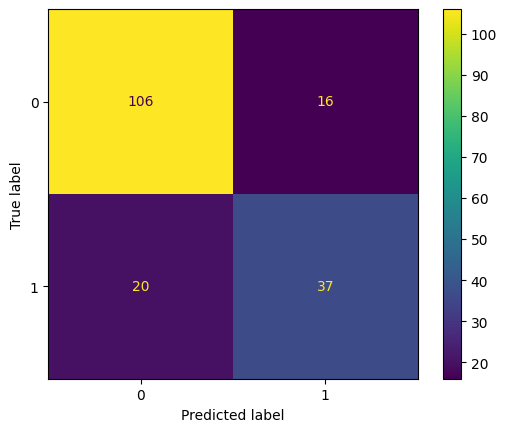

In [56]:
ConfusionMatrixDisplay(confusion_matrix(y_test_3, pred)).plot()